In [1]:
!pip install pint
!pip install scipy
!pip install numpy
!pip install sympy
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 7.2 MB/s eta 0:00:00


In [2]:
from scipy import constants
import pint
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

ureg = pint.UnitRegistry()

# Exercises

In [3]:
# 15.1
v = 344 * ureg.m / ureg.s
f = 784 * ureg.Hz
λ = v / f
T = 1 / f
print(f"(a) {λ.to(ureg.m):.3g}, {T.to(ureg.millisecond):.3g}.")

λ = v / (2 * f)
print(f"(b) {λ.to(ureg.m):.3g}.")

(a) 0.439 meter, 1.28 millisecond.
(b) 0.219 meter.


In [4]:
# 15.3
λ = 800 * ureg.kilometer
T = 1.0 * ureg.h
v = λ / T
print(f"{v.to(ureg.m/ureg.s):.3g}, {v.to(ureg.kilometer/ureg.h):.3g}.")

222 meter / second, 800 kilometer / hour.


In [5]:
# 15.5
# Skip.

In [6]:
# 15.7
y, x, t = sp.symbols('y x t', real=True)
A, k, ω, λ, T, f, v = sp.symbols('A k ω λ T f v', positive=True)
known = {v:8.00, A:0.0700, λ:0.320}

known[k] = 2 * sp.pi/known[λ]
known[ω] = known[v] * known[k]
known[f] = known[ω] / (2 * sp.pi)
known[T] = 1 / known[f]

print(f"(a) {known[f].subs(known).evalf(3)} Hz, {known[T].subs(known).evalf(3)} s, {known[k].subs(known).evalf(3)} rad/m")

equation = sp.Eq(y, (A * sp.cos(k * x + ω * t)).subs(known))
print("(b)")
display(equation)

print(f"(c)")
display((A * sp.cos(k * x + ω * t)).subs(known).subs({x:0.360, t:0.150}).evalf(3))
solve = sp.solve(sp.Eq(0, (A * sp.cos(k * x + ω * t)).subs(known)).subs(x,0.360), t)
display(solve[0].evalf(3))

(a) 25.0 Hz, 0.0400 s, 19.6 rad/m
(b)


Eq(y, 0.07*cos(50.0*pi*t + 6.25*pi*x))

(c)


0.0495

0.00500

In [7]:
# 15.9 CALC
# Skip.

In [8]:
# 15.11
# Skip.

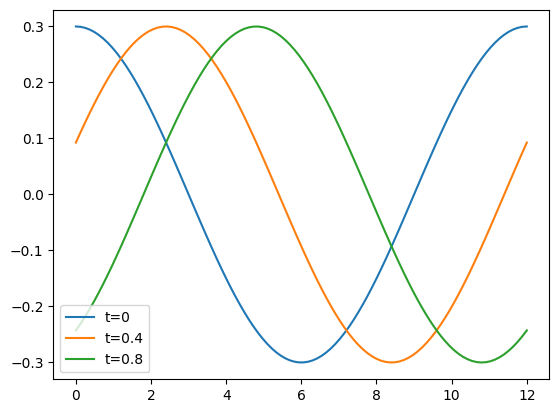

In [9]:
# 15.13
A = 0.300
λ = 12.0
v = 6.00

k = 2 * sp.pi / λ
ω = v * k

y, x, t = sp.symbols('y x t', real=True)
y = A * sp.cos(k * x - ω * t)

x_values = np.linspace(0, 12, 100)
y_values_1 = sp.lambdify(x, y.subs(t, 0))(x_values)
y_values_2 = sp.lambdify(x, y.subs(t, 0.400))(x_values)
y_values_3 = sp.lambdify(x, y.subs(t, 0.800))(x_values)

plt.figure()
plt.plot(x_values, y_values_1, label="t=0")
plt.plot(x_values, y_values_2, label="t=0.4")
plt.plot(x_values, y_values_3, label="t=0.8")
plt.legend()
plt.show()

In [10]:
# 15.15
f = 122 * ureg.Hz
T = 1.50 * ureg.kg * 9.80 * ureg.m / ureg.s**2
μ = 5.70 * 10**(-2) * ureg.kg / ureg.m

v = np.sqrt(T / μ)
print(f"(a) {v.to(ureg.m/ureg.s):.3g}.")
λ = v / f
print(f"(b) {λ.to(ureg.m):.3g}.")

T = 2 * T
v = np.sqrt(T / μ)
λ = v / f
print(f"(c) {v.to(ureg.m/ureg.s):.3g}, {λ.to(ureg.m):.3g}.")

(a) 16.1 meter / second.
(b) 0.132 meter.
(c) 22.7 meter / second, 0.186 meter.


In [11]:
# 15.17
L = 3.90 * ureg.m
t = 0.0492 * ureg.s
m = 52.0 * ureg.kg

v = L / t
F_T = m * 9.80 * ureg.m / ureg.s**2
μ = F_T / v**2
m_wire = L * μ
print(f"{m_wire.to(ureg.kg):.3g}.")

0.316 kilogram.


In [12]:
# 15.19
m_wire = 16.5 * ureg.g
l_wire = 71.0 * ureg.cm
λ = 3.40 * ureg.cm
f = 876 * ureg.Hz

v = λ * f
μ = m_wire / l_wire
F_T = v**2 * μ

print(f"(a) {F_T.to(ureg.N):.3g}.")
print(f"(b) {v.to(ureg.m/ureg.s):.3g}.")

(a) 20.6 newton.
(b) 29.8 meter / second.


In [13]:
# 15.21
# Skip.

In [14]:
# 15.23
F_T = 94.0
v = 406
f = 69.0
P_av = 0.365

μ = F_T / v**2
ω = 2 * np.pi * f
A = sp.symbols('A ', positive=True)

eq = sp.Eq(P_av, 1/2 * sp.sqrt(μ * F_T) * ω**2 * A**2)
sol_A = sp.solve(eq, A)
print(f"A = {sol_A[0].evalf(3)} m.")

A = 0.00410 m.


In [15]:
# 15.25
P = 10.0 * 4 * np.pi * 31.0**2
L = sp.symbols('L ', positive=True)
eq = sp.Eq(1.0 * 10**(-6), P / (4 * np.pi * L**2))
sol_L = sp.solve(eq, L)
print(f"{(sol_L[0]/1000).evalf(3)} km.")

98.0 km.


In [16]:
# 15.27 Energy Output.
I, L = sp.symbols('I L ', positive=True)
P = 2.0 * 10**(-2) * 4 * np.pi * 4.2**2

I = P / (4 * sp.pi * L**2)
print(f"(a) {sp.lambdify(L, I)(3.4):.3g} W/m^2.")

W = P * (60 * 60)
print(f"(b) {W:.3g} J.")

(a) 0.0305 W/m^2.
(b) 1.6e+04 J.


In [17]:
# 15.29
# Skip.

In [18]:
# 15.31
# Skip.

In [19]:
# 15.33
# Skip.

In [20]:
# 15.35
# 草稿纸做。

In [21]:
# 15.37
m_wire = 40.0 * 10**(-3)
L = 80.0 * 10**(-2)
f_1 = 60.0
A_sw = 0.300 * 10**(-2)

λ = 2 * L
k = 2 * sp.pi / λ
ω = 2 * sp.pi * f_1

v = ω / k
print(f"(a) {v.evalf(3)} m/s.")

μ = m_wire / L
F_T = v**2 * μ
print(f"(b) {F_T.evalf(3)} N.")

print(f"(c)")
x, t = sp.symbols('x t ', real = True)
y = A_sw * sp.sin(k * x) * sp.sin(ω * t)
v_y = y.diff(t)
display(v_y.subs(x, λ/4))
a_y = v_y.diff(t)
display(a_y.subs(x, λ/4))
v_y_max = 0.36 * sp.pi
a_y_max = 43.2 * sp.pi**2
print(f"v_y_max = {v_y_max.evalf(3)} m/s, a_y_max = {a_y_max.evalf(3)} m/s^2.")

(a) 96.0 m/s.
(b) 461 N.
(c)


0.36*pi*cos(120*pi*t)

-43.2*pi**2*sin(120*pi*t)

v_y_max = 1.13 m/s, a_y_max = 426 m/s^2.


In [22]:
# 15.39 CALC
# 草稿纸上做。

In [23]:
# 15.41
# Pass.

In [24]:
# 15.43
# Pass.

# Problems

In [25]:
# 15.45
λ = 0.400 * ureg.m
v_y_max = 3.00 * ureg.m / ureg.s
a_y_max = 8.50 * 10**4 * ureg.m / ureg.s**2

ω = a_y_max / v_y_max
A = v_y_max / ω
f = ω / (2 * np.pi)
v = λ * f

print(f"v = {v:.3g}, A = {A:.3g}.")

v = 1.8e+03 meter / second, A = 0.000106 meter.


In [26]:
# 15.47 CALC
# A, λ, v, k, ω = sp.symbols('A λ v ', positive=True)
# known = {A:2.50*10**(-3), λ:1.80m, v:36.0}

# known[k] = 2 * sp.pi / λ
# known[ω] = known[v] * known[k]

A = 2.50 * 10**(-3)
λ = 1.80
v = 36.0

k = 2 * sp.pi / λ
ω = v * k
f = ω / (2 * sp.pi)

print(f"(a) f = {f.evalf(3)} Hz, ω = {ω.evalf(3)} rad/s, k = {k.evalf(3)} rad/m.")

x, t = sp.symbols('x t ', real = True)
y = A * sp.cos(k * x - ω * t)

print("(b) y = ")
display(y.nsimplify())

# 余下的Pass.

(a) f = 20.0 Hz, ω = 126 rad/s, k = 3.49 rad/m.
(b) y = 


cos(40*pi*t - 10*pi*x/9)/400

In [27]:
# 15.49 CP
m_wire = 9.80 * 2.0 / (4.0**2 * 2 * np.sin(np.pi/6) * 20.4)
print(f"{m_wire:.3g} kg.")

0.06 kg.


In [28]:
# 15.51
μ = 14.5 * 10**(-9) / (2.00 * 10**(-2))
F_T = 0.400 * 9.80

v = np.sqrt(F_T / μ)
t = 26.7 * 10**(-3)
L = v * t

print(f"{L:.3g} m.")

62.1 m.


In [29]:
# 15.53 CP
F_T = 235 * (1/2) * np.sin(np.deg2rad(33)) / np.sin(np.deg2rad(57))
μ = 0.732 / 5.00

v = np.sqrt(F_T / μ)
λ = 5.00 / 3
f = v / λ
λ_sound = 344 / f

print(f"f = {f:.3g} Hz, λ_wind = {λ_sound:.3g} m.")

f = 13.7 Hz, λ_wind = 25.1 m.


In [30]:
# 15.55
n, L = sp.symbols('n L ', positive=True)
v = 390
f_1 = 535
f_2 = 635
equations = [
    sp.Eq(n * v / 2 / L, f_1),
    sp.Eq((n + 1) * v / 2 / L, f_2)
]
sol = sp.solve(equations, [n, L])
print(f"{sol[L].evalf(3)} m.")

1.95 m.


In [31]:
# 15.57 CP
T_Al, T_Cu = sp.symbols('T_Al T_Cu ', positive = True)
L = 1.80
w_bar = 539
equations = [
  sp.Eq(T_Al * 1.80 + T_Cu * 0.40, w_bar * 0.9),
  sp.Eq(T_Cu * 1.40, w_bar * 0.9)
]
sol = sp.solve(equations, [T_Al, T_Cu])

r = 0.320 * 10**(-3)
A = np.pi * r**2
ρ_Al = 2.7 * 10**3
ρ_Cu = 8.9 * 10**3

μ_Al = ρ_Al * A
μ_Cu = ρ_Cu * A

v_Al = sp.sqrt(sol[T_Al] / μ_Al)
v_Cu = sp.sqrt(sol[T_Cu] / μ_Cu)

f_1_Al = v_Al / 2 / 0.6
f_1_Cu = v_Cu / 2 / 0.6

print(f"{f_1_Al.evalf(3)} Hz (Al), {f_1_Cu.evalf(3)} Hz (Cu).")

392 Hz (Al), 290 Hz (Cu).


In [32]:
# 15.59
λ = 6.28 * ureg.centimeter * 2
L = (3/2) * λ
print(f"(a) L_wire = {L:.3g}.")

T = 8.40 * ureg.millisecond * 2
f = 1 / T
v = (2/3) * L * f

F_T = 5.0 * ureg.N
μ = F_T / v**2
m_wire = L * μ
m_wire = m_wire.to(ureg.kg)
print(f"(b) m_wire = {m_wire:.3g}.")

(a) L_wire = 18.8 centimeter.
(b) m_wire = 0.0169 kilogram.


In [33]:
# 15.61
L_wire = 7.80 * ureg.m
m_wire = 5.80 * ureg.g
λ = 0.250 * ureg.m
v = 35.0 * ureg.m / ureg.s

μ_wire = m_wire / L_wire
F_T = v**2 * μ_wire
P_av = 46.0 * ureg.W
k = 2 * np.pi / λ
ω = k * v
A = (2 * P_av / (k * F_T * ω))**(1/2)
A = A.to(ureg.m)
print(f"(a) A = {A:.3g}.")

P_av_2 = 2**3 * P_av
print(f"(b) {P_av_2:.3g}.")

(a) A = 0.0676 meter.
(b) 368 watt.


In [41]:
# 15.63 CP
m = 101 * 1 * ureg.g
L = 1.50 * ureg.m
μ = m / L
μ = μ.to(ureg.kg / ureg.m)
print(f"(a) μ = {μ:.3g}.")

k = 28.8 * ureg.N / ureg.m
ΔL = (1.50 - 1.005) * ureg.m
F_T = k * ΔL
print(f"(b) F_T = {F_T:.3g}.")

v = (F_T / μ)**(1/2)
v = v.to(ureg.m/ureg.s)
print(f"(c) v = {v:.3g}.")

f = v / (2 * L) * 4
f = f.to(ureg.Hz)
print(f"(d) f = {f:.3g}.")

print(f"(e) 1, 26, 51, 76, 101.")

λ = 1/2 * L
ω = (2 * np.pi / λ) * v
A_sw = 7.54 * ureg.m / ureg.s / ω
A_sw = A_sw.to(ureg.m)
print(f"(f) A_sw = {A_sw:.3g}.")

# (g)(h) Skip.

(a) μ = 0.0673 kilogram / meter.
(b) F_T = 14.3 newton.
(c) v = 14.6 meter / second.
(d) f = 19.4 hertz.
(e) 1, 26, 51, 76, 101.
(f) A_sw = 0.0619 meter.


In [44]:
# 15.65
L = 2.50 * ureg.m
F_T = 90.0 * ureg.N
A_sw = 3.50 * ureg.cm
v_y_max = 28.0 * ureg.m / ureg.s

ω = v_y_max / A_sw
λ = L
k = 2 * np.pi / λ
v = ω / k
μ = F_T / v**2
m = μ * L
m = m.to(ureg.kg)
print(f"(a) m = {m:.3g}.")

a_y_max = ω**2 * A_sw
a_y_max = a_y_max.to(ureg.m / ureg.s**2)
print(f"(b) a_y_max = {a_y_max:.3g}.")

(a) m = 0.00222 kilogram.
(b) a_y_max = 2.24e+04 meter / second ** 2.


In [47]:
# 15.67
L = 55.0 * ureg.cm
A = np.pi * (1.14 * ureg.mm  / 2)**2
ρ = 7.8 * 10**3 * ureg.kg / ureg.m**3
λ = L
f = 311 * ureg.Hz

μ = ρ * A
v = λ * f
F_T = v**2 * μ
F_T = F_T.to(ureg.N)
print(f"F_T = {F_T:.3g}.")

F_T = 233 newton.


In [50]:
# 15.69 CP
w_rock = 164 * ureg.N
ρ_rock = 3200 * ureg.kg / ureg.m**3
L_wire = 3.00 * ureg.m
f_in_air = 42.0 * ureg.Hz
f_in_liquid = 28.0 * ureg.Hz
g = 9.80 * ureg.m / ureg.s**2

λ = L_wire
F_T_in_air = w_rock
v_in_air = λ * f_in_air
μ = F_T_in_air / v_in_air**2

v_in_liquid = λ * f_in_liquid
F_T_in_liquid = v_in_liquid**2 * μ
m_rock = w_rock / g
V_rock = m_rock / ρ_rock
F_buoyancy = F_T_in_air - F_T_in_liquid
ρ_liquid = F_buoyancy / V_rock / g
ρ_liquid = ρ_liquid.to(ureg.kg / ureg.m**3)
print(f"ρ_liquid = {ρ_liquid:.3g}.")

ρ_liquid = 1.78e+03 kilogram / meter ** 3.


In [55]:
# 15.71 Tuning an Instrument.
L = 0.625 * ureg.m
m = 14.7 * ureg.g
f_C = 65.4 * ureg.Hz
f_D = 73.4 * ureg.Hz

μ = m / L
λ = 2 * L
ω = 2 * np.pi * f_C
k = 2 * np.pi / λ
v = ω / k
F_T = v**2 * μ
print(f"(a) {F_T.to(ureg.N):.3g}.")

ω = 2 * np.pi * f_D
k = 2 * np.pi / λ
v = ω / k
F_T_2 = v**2 * μ
increase = (F_T_2 - F_T) / F_T
print(f"(b) {increase.to(ureg.dimensionless):.3g}")

(a) 157 newton.
(b) 0.26 dimensionless


Over.